In [2]:
!pip install tensorflow
!pip install keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras_tuner as kt

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ------ -------------------------------- 20.5/129.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------- ----------- 92.2/129.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [3]:
data=pd.read_csv('Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

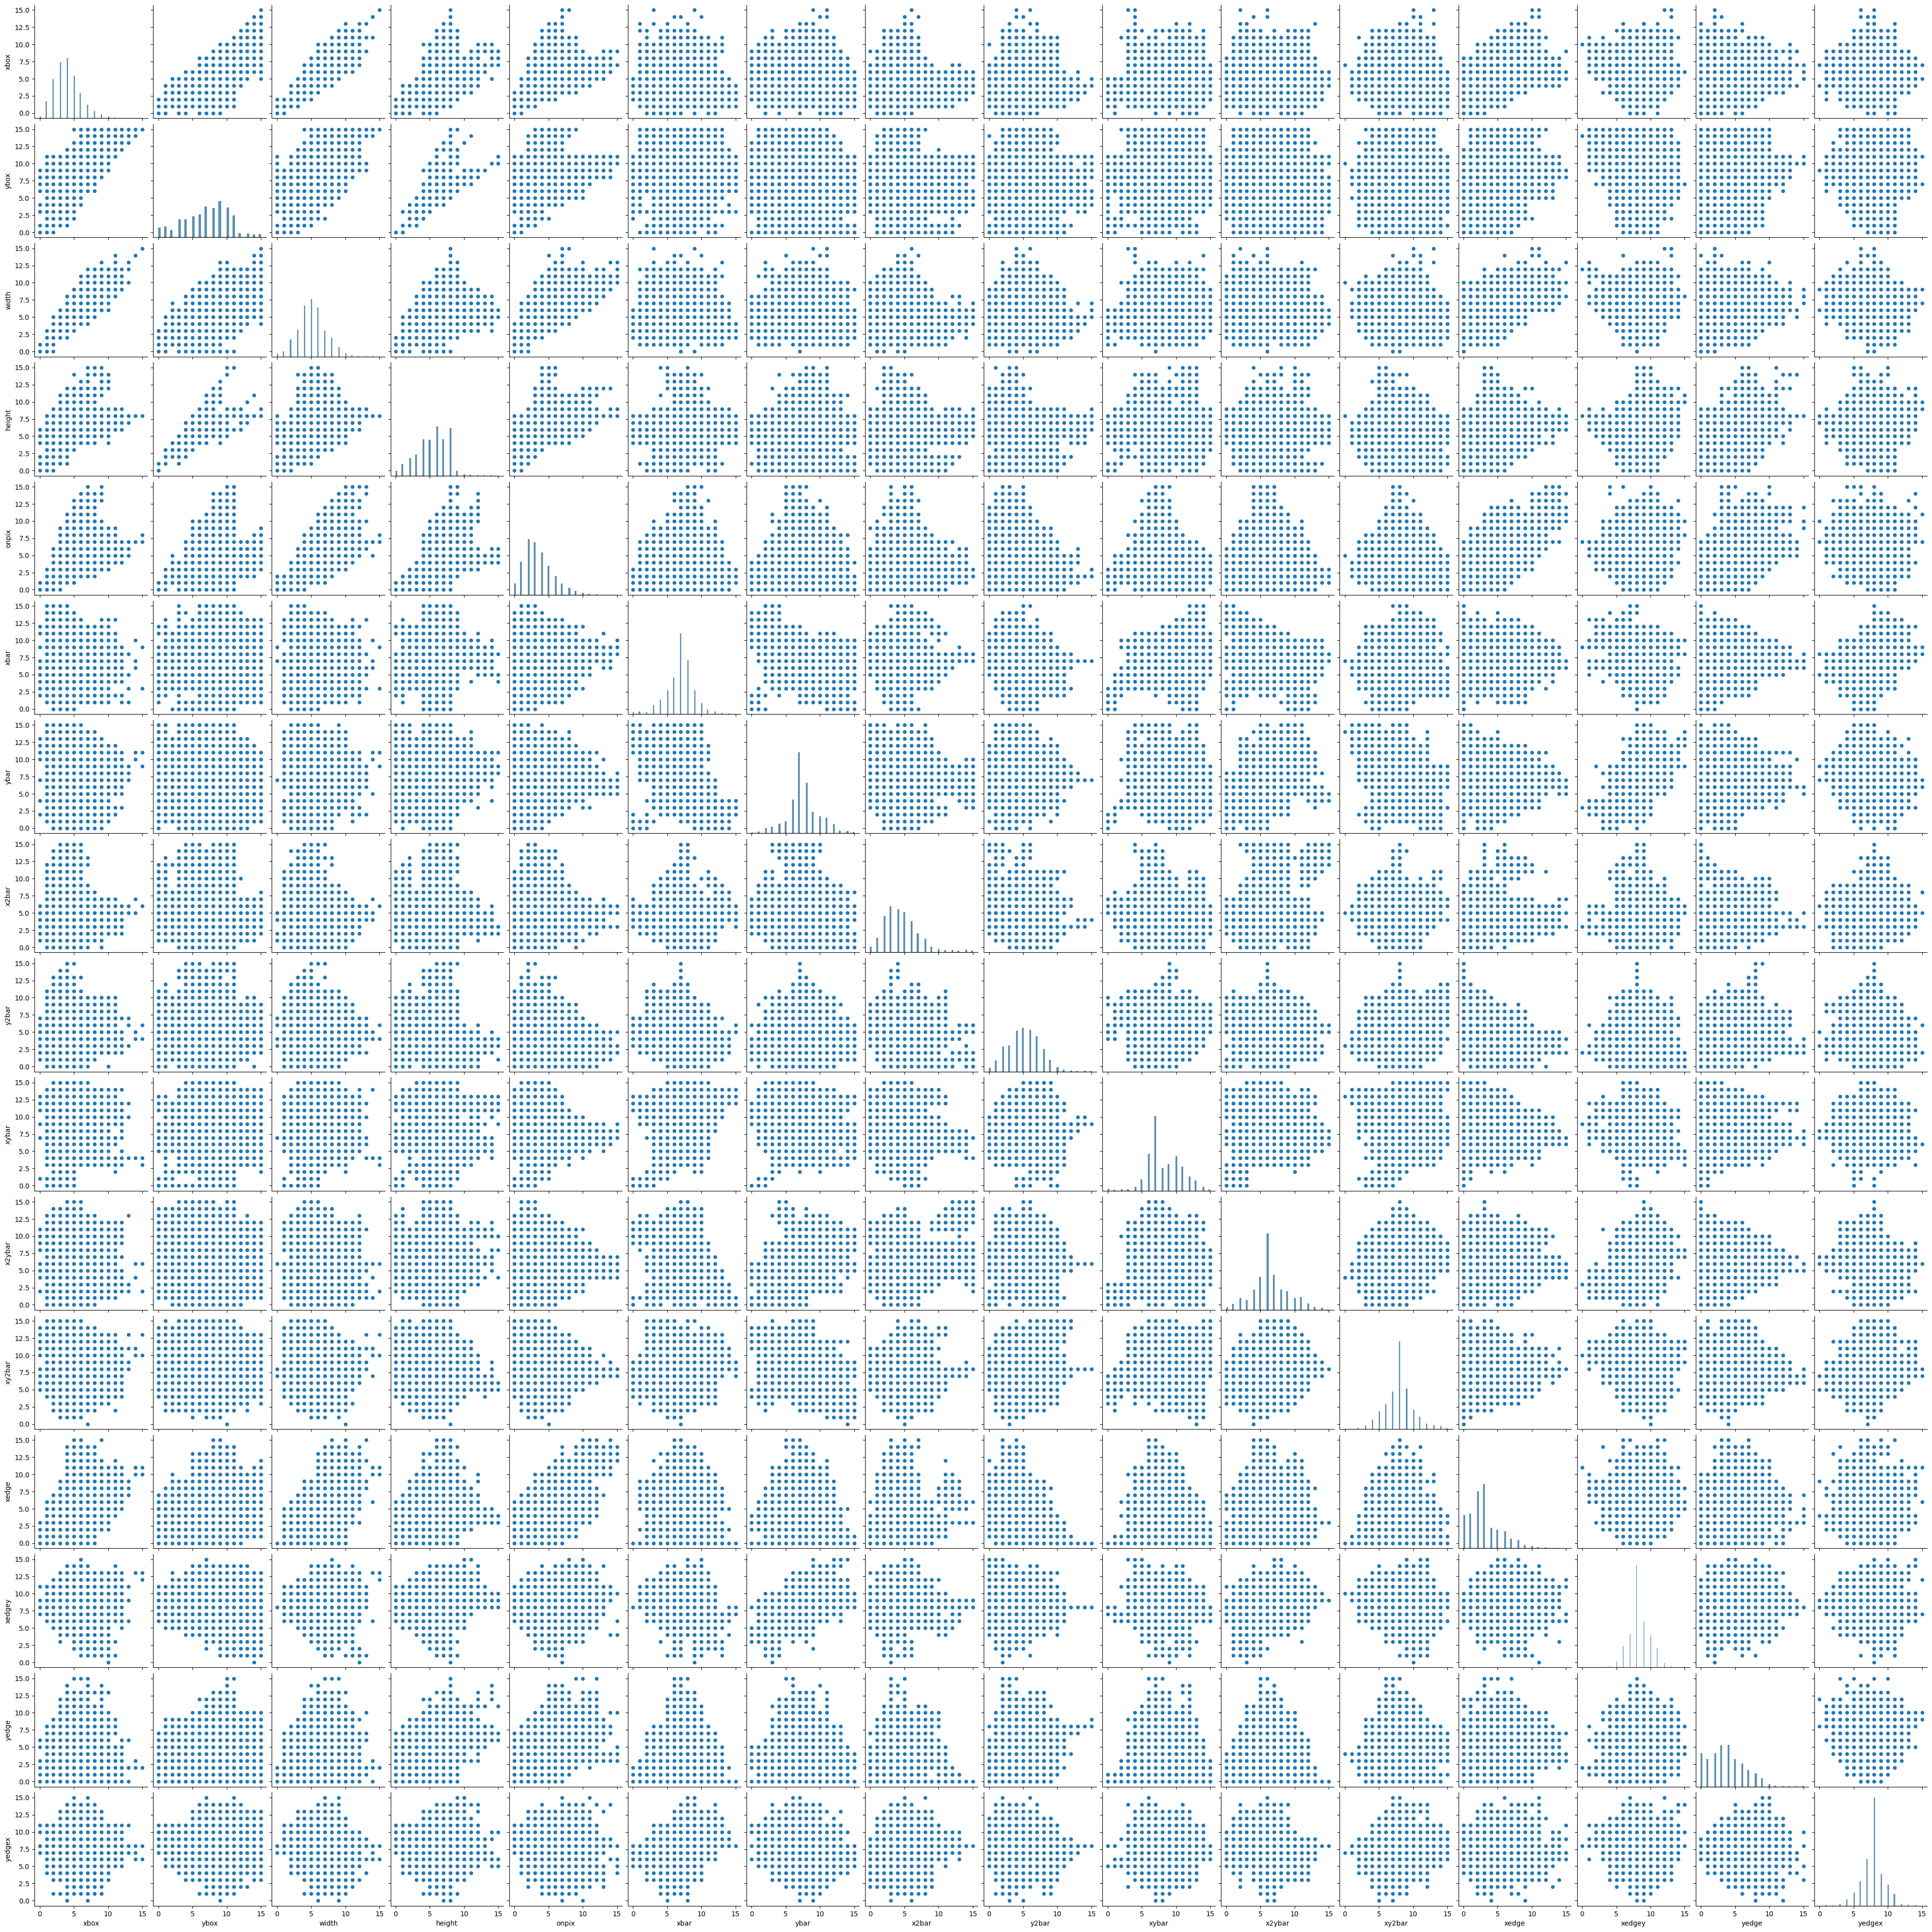

In [7]:
sns.pairplot(data)
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_34692\101522456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1,vmax=1,center=0,fmt=".1f")


<Figure size 1000x600 with 0 Axes>

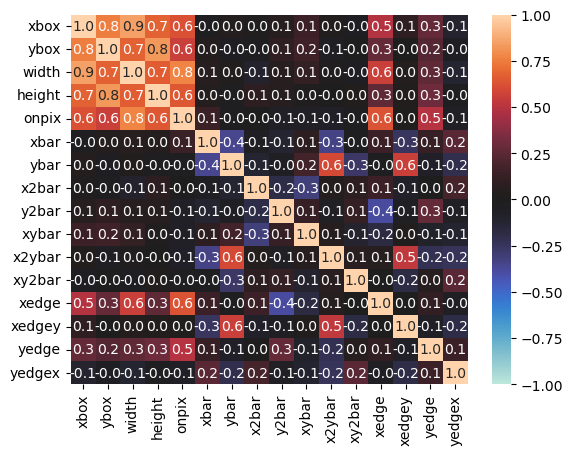

<Figure size 1000x600 with 0 Axes>

In [8]:
sns.heatmap(data.corr(), annot=True, vmin=-1,vmax=1,center=0,fmt=".1f")
plt.figure(figsize=(10, 6))

In [9]:
# data Normalization
from sklearn.preprocessing import StandardScaler

# Assuming the last column is the target
X = data.drop(columns='letter')
y = data['letter']

# Normalizing features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [10]:
# encoding target columns as the target we have is object data type
from sklearn.preprocessing import LabelEncoder
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)


In [12]:

# Define the model creation function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=16, max_value=64, step=16),
                    activation=hp.Choice('activation', values=['relu', 'tanh']),
                    input_shape=(X_train.shape[1],)))
    for _ in range(hp.Int('num_layers', 1, 3)):  # Number of hidden layers
        model.add(Dense(units=hp.Int('units', min_value=16, max_value=64, step=16),
                        activation=hp.Choice('activation', values=['relu', 'tanh'])))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='intro_to_kt'
)




Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [13]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



In [14]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


C:\Users\priya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\priya\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
# Evaluate the best model
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc}")

# Generate predictions
y_pred_proba = best_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels


Test Accuracy: 0.9326666593551636
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:



# Print classification report
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
# Print precision, recall, and F1 score
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))



Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.99      0.97       232
           B       0.86      0.92      0.89       229
           C       0.95      0.91      0.93       201
           D       0.89      0.93      0.91       250
           E       0.90      0.95      0.92       238
           F       0.94      0.91      0.93       211
           G       0.96      0.93      0.94       230
           H       0.91      0.78      0.84       218
           I       0.97      0.90      0.94       221
           J       0.92      0.92      0.92       228
           K       0.93      0.90      0.92       188
           L       0.96      0.95      0.95       231
           M       0.98      0.97      0.97       252
           N       0.96      0.92      0.94       231
           O       0.91      0.93      0.92       218
           P       0.93      0.92      0.92       248
           Q       0.95      0.94      0.94       253
    